Steps to follow:

* Compute the camera calibration matrix and distortion coefficient given a set of chessboard imgs

* Apply a distortion correction to raw images

* Use color transforms, gradients, etc., to create a thresholded binary image

* Apply a perspective transform to rectify binary image ("birds-eye view").

* Detect lane pixels and fit to find the lane boundary.

* Determine the curvature of the lane and vehicle position with respect to center.

* Warp the detected lane boundaries back onto the original image.

* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


### Imports 

In [2]:
import numpy as np
import pandas as pd
import cv2
import pickle 
import os,sys
import glob
import matplotlib.pyplot as plt
%matplotlib inline 
from ipywidgets import interact, interactive, fixed
from IPython.display import HTML

print('Done importing')

Done importing


In [3]:
os.listdir('./camera_cal/')

['calibration1.jpg',
 'calibration10.jpg',
 'calibration11.jpg',
 'calibration12.jpg',
 'calibration13.jpg',
 'calibration14.jpg',
 'calibration15.jpg',
 'calibration16.jpg',
 'calibration17.jpg',
 'calibration18.jpg',
 'calibration19.jpg',
 'calibration2.jpg',
 'calibration20.jpg',
 'calibration3.jpg',
 'calibration4.jpg',
 'calibration5.jpg',
 'calibration6.jpg',
 'calibration7.jpg',
 'calibration8.jpg',
 'calibration9.jpg']

### Camera Calibration using Chessboard Images

##### Visualization of the chessboard images

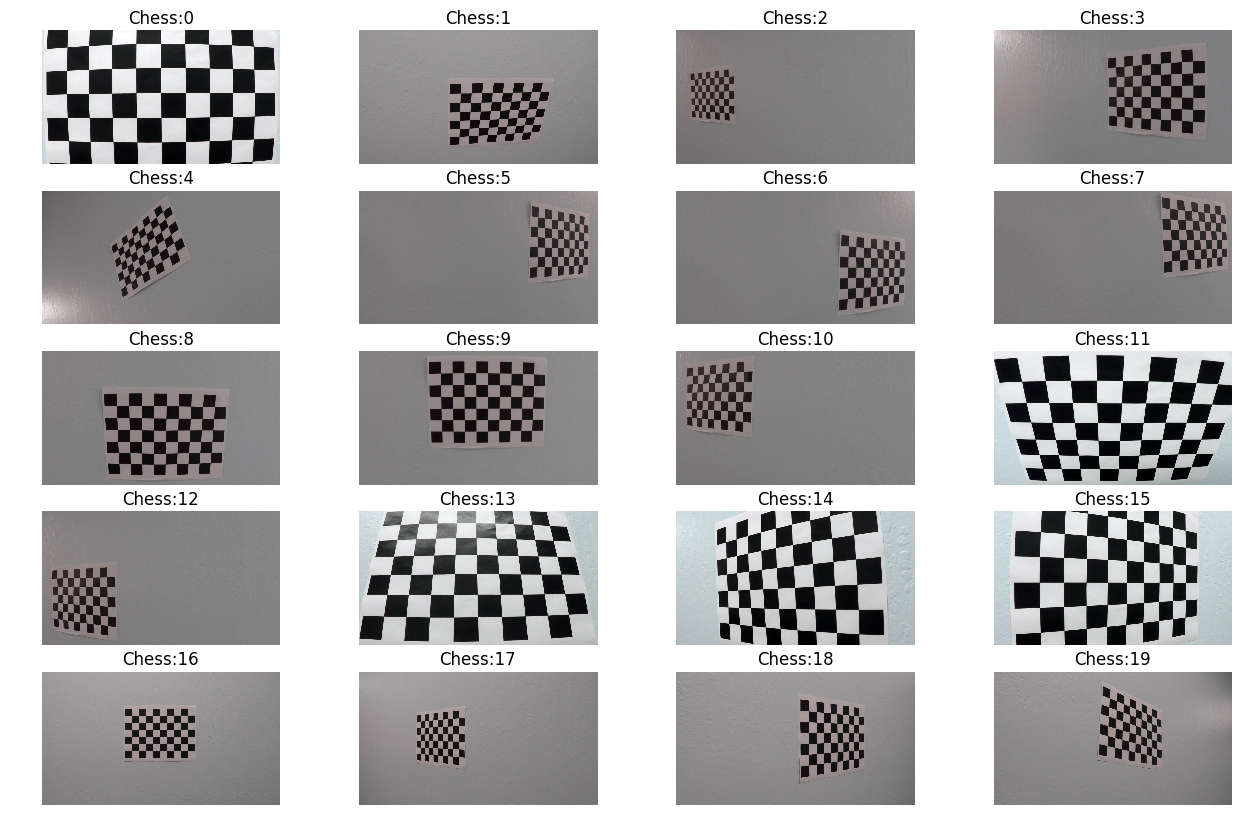

In [43]:
#make a list of chessboard images for calibration
images = os.listdir('camera_cal/') #probably better use glob.glob(./camera_cal/calib*,jpg)

fig,axs = plt.subplots(5,4,figsize=(16,10))
fig.subplots_adjust(hspace = 0.2, wspace=0.1)
axs = axs.ravel()

for i,frame in enumerate(images):
    chessName = 'camera_cal/'+images[i]
    img = cv2.imread(chessName)
    axs[i].axis('off')
    axs[i].imshow(img)
    axs[i].set_title('Chess:{}'.format(i))

##### Step through the images and find the corners and draw them on the figures for calibration

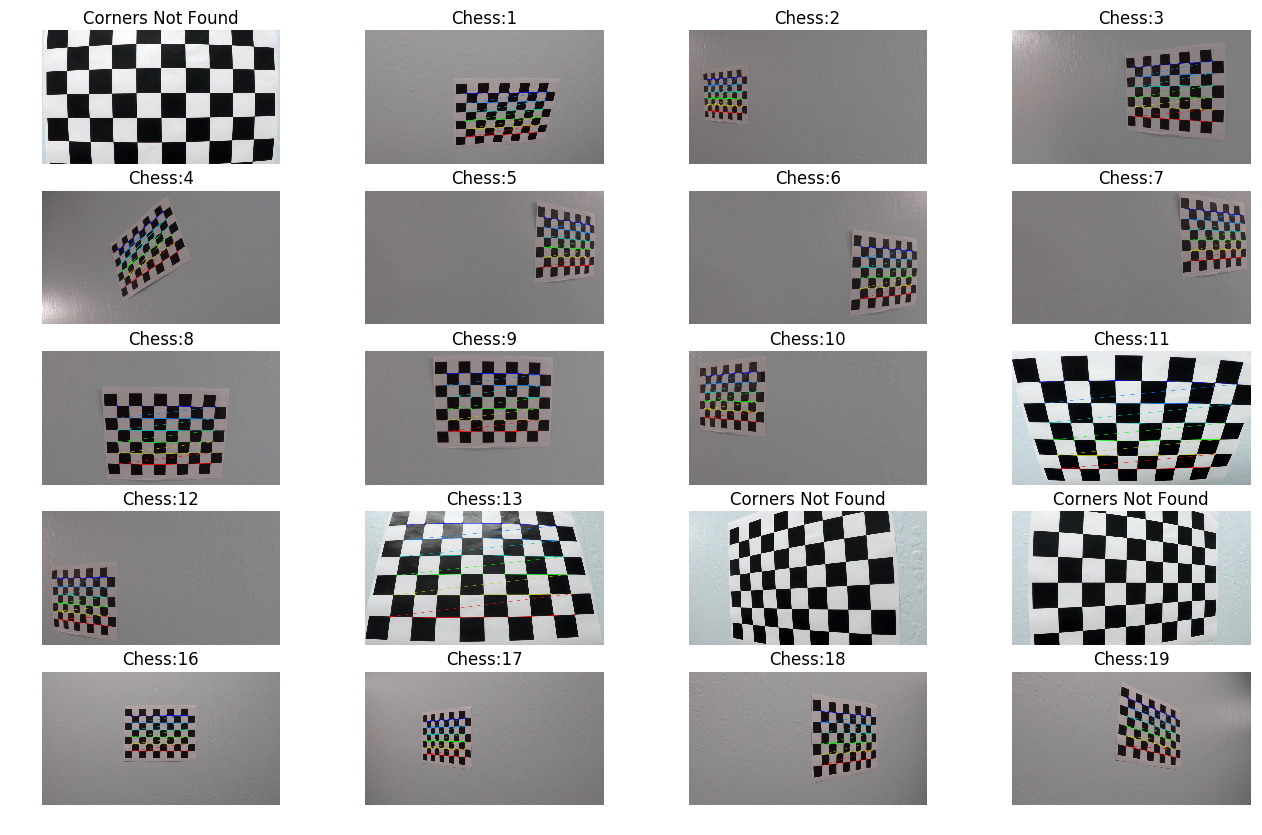

In [50]:
#Array to store obj points and image points
objpoints = []
imgpoints = []

nx,ny = 9,6 

#prepare obj points like (0,0,0),(1,0,0) etc
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

#make a list of the chessboard image names 
images = ['camera_cal/'+name for name in os.listdir('camera_cal/')]

fig,axs = plt.subplots(5,4,figsize=(16,10))
fig.subplots_adjust(hspace = 0.2, wspace=0.2)
axs = axs.ravel()

for i,frame in enumerate(images):
    img = cv2.imread(frame)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #Find the chess board corners
    ret,corners = cv2.findChessboardCorners(gray,(nx,ny),None)
    if ret==True:
        objpoints.append(objp)
        imgpoints.append(corners)
        #draw and display
        cv2.drawChessboardCorners(img,(nx,ny), corners,ret)
        axs[i].axis('off')
        axs[i].imshow(img)
        axs[i].set_title('Chess:{}'.format(i))
    else:
        axs[i].axis('off')
        axs[i].imshow(img)
        axs[i].set_title('Corners Not Found')

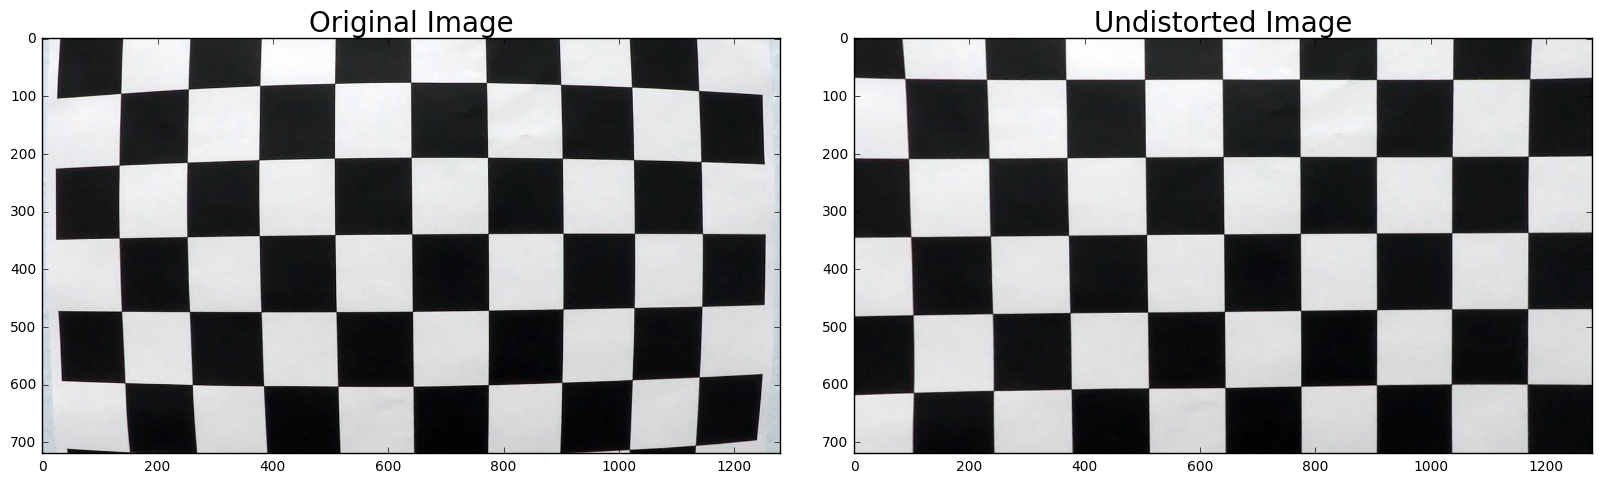

In [53]:
#Undistortion
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1],img.shape[0])

ret,mtx,dist,rvecs, tvecs = cv2.calibrateCamera(objpoints,imgpoints,img_size,None,None)
dst = cv2.undistort(img,mtx, dist, None, mtx)

#save the calibration matrix for later use
dist_pickle = {}
dist_pickle['mtx'] = mtx
dist_pickle['dist'] = dist
pickle.dump(dist_pickle,open('calibration.p','wb'))

#Visualizing undistorted image
f,(ax1,ax2) = plt.subplots(1,2, figsize=(20,12))
f.subplots_adjust(hspace=0.2,wspace=0.1)

ax1.imshow(img)
ax1.set_title('Original Image',fontsize=20)
ax2.imshow(dst)
ax2.set_title('Undistorted Image',fontsize=20)

